Quik Start: https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/doc_en/quickstart_en.md  
PyPi: https://pypi.org/project/paddleocr/1.0.1/

In [1]:
!pip list | grep paddle

paddleocr                                                     2.7.3
paddlepaddle                                                  2.6.1


In [2]:
from paddleocr import PaddleOCR, draw_ocr

from PIL import Image
from PIL import ImageFont

import numpy as np

In [3]:
ocr = PaddleOCR(use_angle_cls=True, lang='japan')
ocr

#download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to /Users/YShimada-MBP16/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar
#download https://paddleocr.bj.bcebos.com/PP-OCRv4/multilingual/japan_PP-OCRv4_rec_infer.tar to /Users/YShimada-MBP16/.paddleocr/whl/rec/japan/japan_PP-OCRv4_rec_infer/japan_PP-OCRv4_rec_infer.tar
#download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /Users/YShimada-MBP16/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar

[2024/07/05 09:51:34] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/YShimada-MBP16/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/YShimada-MBP16/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_

In [5]:
?ocr

Signature:      ocr(img, cls=True)
Type:           PaddleOCR
String form:    <paddleocr.paddleocr.PaddleOCR object at 0x7fdd4aaab550>
File:           /opt/anaconda3/envs/OCR/lib/python3.8/site-packages/paddleocr/paddleocr.py
Docstring:      <no docstring>
Init docstring:
paddleocr package
args:
    **kwargs: other params show in paddleocr --help

In [14]:
?ocr.ocr

Signature:
ocr.ocr(
    img,
    det=True,
    rec=True,
    cls=True,
    bin=False,
    inv=False,
    alpha_color=(255, 255, 255),
)
Docstring:
OCR with PaddleOCR
args：
    img: img for OCR, support ndarray, img_path and list or ndarray
    det: use text detection or not. If False, only rec will be exec. Default is True
    rec: use text recognition or not. If False, only det will be exec. Default is True
    cls: use angle classifier or not. Default is True. If True, the text with rotation of 180 degrees can be recognized. If no text is rotated by 180 degrees, use cls=False to get better performance. Text with rotation of 90 or 270 degrees can be recognized even if cls=False.
    bin: binarize image to black and white. Default is False.
    inv: invert image colors. Default is False.
    alpha_color: set RGB color Tuple for transparent parts replacement. Default is pure white.
File:      /opt/anaconda3/envs/OCR/lib/python3.8/site-packages/paddleocr/paddleocr.py
Type:      method

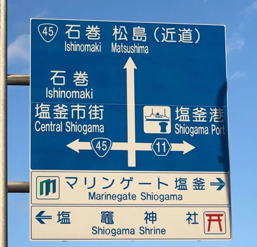

In [29]:
img1 = './images/交通標識1.jpg'

im = Image.open(img1)
#im.size
im.resize((im.width//3, im.height//3))

In [60]:
result = ocr.ocr(img1, cls=True)
result

[2024/07/04 16:44:15] ppocr DEBUG: dt_boxes num : 22, elapsed : 0.45591187477111816
[2024/07/04 16:44:15] ppocr DEBUG: cls num  : 22, elapsed : 0.18453097343444824
[2024/07/04 16:44:18] ppocr DEBUG: rec_res num  : 22, elapsed : 2.5698940753936768


[[[[[124.0, 78.0], [164.0, 78.0], [164.0, 112.0], [124.0, 112.0]],
   ('45', 0.9999099969863892)],
  [[[198.0, 73.0], [349.0, 78.0], [348.0, 121.0], [197.0, 117.0]],
   ('石巻', 0.999847412109375)],
  [[[333.0, 78.0], [444.0, 83.0], [442.0, 123.0], [331.0, 118.0]],
   ('松島', 0.9999858140945435)],
  [[[462.0, 81.0], [597.0, 87.0], [595.0, 131.0], [460.0, 124.0]],
   ('(近道', 0.8616753220558167)],
  [[[447.0, 94.0], [460.0, 94.0], [460.0, 112.0], [447.0, 112.0]],
   ('-', 0.9457537531852722)],
  [[[196.0, 122.0], [304.0, 126.0], [303.0, 159.0], [195.0, 154.0]],
   ('Ishinomaki', 0.9941931962966919)],
  [[[336.0, 127.0], [446.0, 131.0], [444.0, 164.0], [334.0, 159.0]],
   ('Matsushima', 0.9985103607177734)],
  [[[150.0, 209.0], [268.0, 213.0], [266.0, 261.0], [148.0, 257.0]],
   ('石巻', 0.9999611973762512)],
  [[[140.0, 262.0], [278.0, 266.0], [277.0, 299.0], [139.0, 294.0]],
   ('Ishinomaki', 0.966429591178894)],
  [[[108.0, 311.0], [309.0, 316.0], [308.0, 358.0], [107.0, 354.0]],
   ('塩釜市街'

In [43]:
type(result)

list

In [44]:
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[[[124.0, 78.0], [164.0, 78.0], [164.0, 112.0], [124.0, 112.0]], ('45', 0.9999099969863892)]
[[[198.0, 73.0], [349.0, 78.0], [348.0, 121.0], [197.0, 117.0]], ('石巻', 0.999847412109375)]
[[[333.0, 78.0], [444.0, 83.0], [442.0, 123.0], [331.0, 118.0]], ('松島', 0.9999858140945435)]
[[[462.0, 81.0], [597.0, 87.0], [595.0, 131.0], [460.0, 124.0]], ('(近道', 0.8616753220558167)]
[[[447.0, 94.0], [460.0, 94.0], [460.0, 112.0], [447.0, 112.0]], ('-', 0.9457537531852722)]
[[[196.0, 122.0], [304.0, 126.0], [303.0, 159.0], [195.0, 154.0]], ('Ishinomaki', 0.9941931962966919)]
[[[336.0, 127.0], [446.0, 131.0], [444.0, 164.0], [334.0, 159.0]], ('Matsushima', 0.9985103607177734)]
[[[150.0, 209.0], [268.0, 213.0], [266.0, 261.0], [148.0, 257.0]], ('石巻', 0.9999611973762512)]
[[[140.0, 262.0], [278.0, 266.0], [277.0, 299.0], [139.0, 294.0]], ('Ishinomaki', 0.966429591178894)]
[[[108.0, 311.0], [309.0, 316.0], [308.0, 358.0], [107.0, 354.0]], ('塩釜市街', 0.9980634450912476)]
[[[526.0, 320.0], [673.0, 324.0], [6

In [61]:
result = result[0]

In [64]:
draw_ocr

<function tools.infer.utility.draw_ocr(image, boxes, txts=None, scores=None, drop_score=0.5, font_path='./doc/fonts/simfang.ttf')>

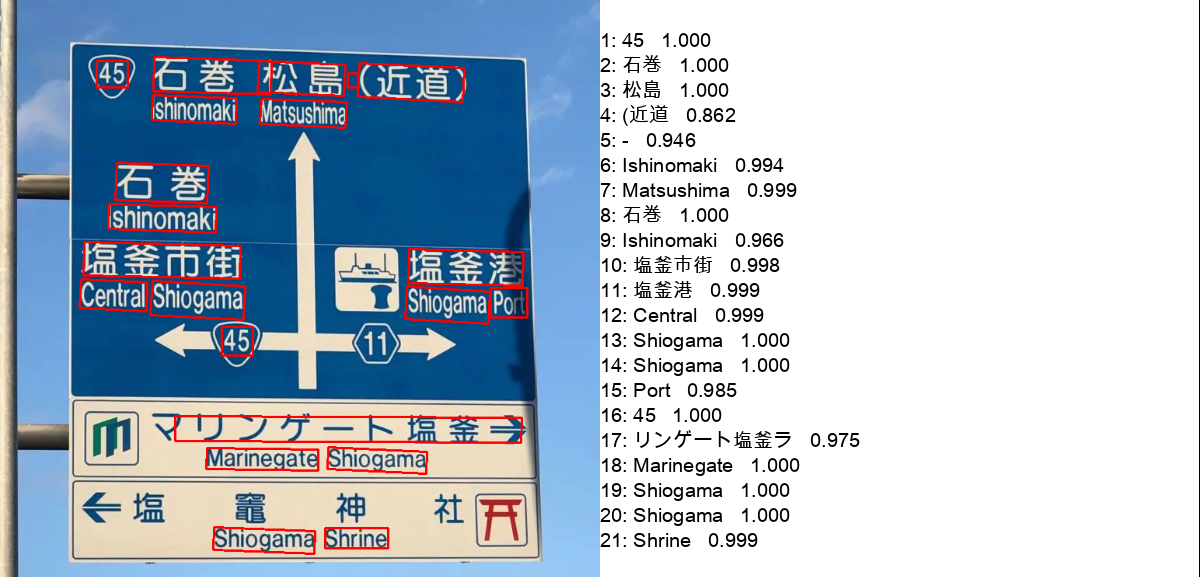

In [76]:
image = Image.open(img1).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
font = ImageFont.load_default()
#im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
im_show = draw_ocr(image, boxes, txts, scores, font_path='/Library/Fonts//Arial Unicode.ttf')
im_show = Image.fromarray(im_show)
im_show

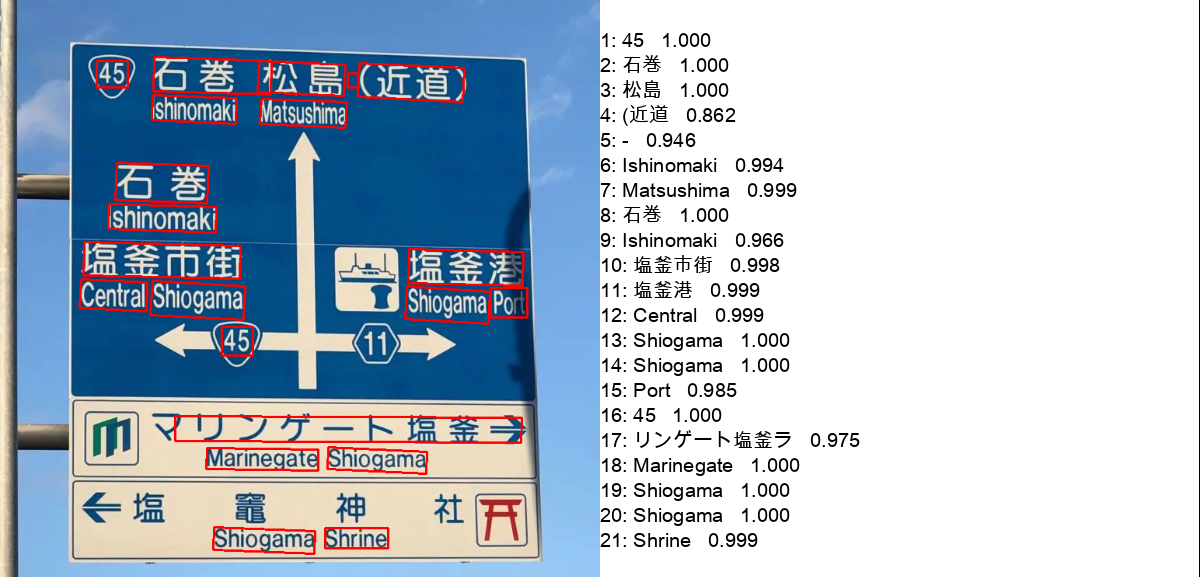

In [77]:
im_show

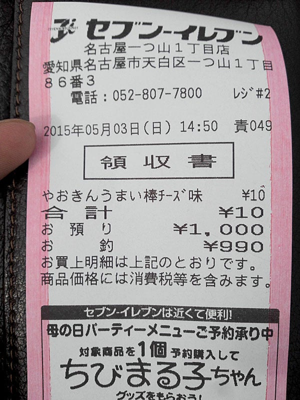

In [81]:
img2 = './images/レシート1.jpg'

im = Image.open(img2)
#im.size
im.resize((im.width//2, im.height//2))

In [87]:
result = ocr.ocr(img2, cls=True)

[2024/07/04 16:53:31] ppocr DEBUG: dt_boxes num : 26, elapsed : 0.33400988578796387
[2024/07/04 16:53:32] ppocr DEBUG: cls num  : 26, elapsed : 0.20203113555908203
[2024/07/04 16:53:35] ppocr DEBUG: rec_res num  : 26, elapsed : 3.4008419513702393


In [88]:
result = result[0]

In [89]:
result

[[[[168.0, 82.0], [469.0, 82.0], [469.0, 112.0], [168.0, 112.0]],
  ('名古屋一つ山1丁目店', 0.9805779457092285)],
 [[[87.0, 154.0], [193.0, 149.0], [194.0, 173.0], [89.0, 178.0]],
  ('86番3', 0.9989992380142212)],
 [[[139.0, 181.0], [404.0, 169.0], [405.0, 200.0], [140.0, 212.0]],
  ('電話:052-807-7800', 0.9881197214126587)],
 [[[465.0, 172.0], [542.0, 172.0], [542.0, 200.0], [465.0, 200.0]],
  ('レツ`井2', 0.8359878659248352)],
 [[[357.0, 239.0], [438.0, 237.0], [438.0, 265.0], [358.0, 267.0]],
  ('14:50', 0.9996344447135925)],
 [[[467.0, 237.0], [544.0, 237.0], [544.0, 266.0], [467.0, 266.0]],
  ('青049', 0.9336075782775879)],
 [[[85.0, 249.0], [341.0, 239.0], [342.0, 270.0], [87.0, 280.0]],
  ('2015年05月03日(日)', 0.9596554636955261)],
 [[[201.0, 310.0], [260.0, 310.0], [260.0, 341.0], [201.0, 341.0]],
  ('令頁', 0.7967320680618286)],
 [[[88.0, 379.0], [403.0, 379.0], [403.0, 403.0], [88.0, 403.0]],
  ('やおきんうまい棒チー入味', 0.9154184460639954)],
 [[[480.0, 374.0], [530.0, 369.0], [533.0, 401.0], [482.0, 406.0

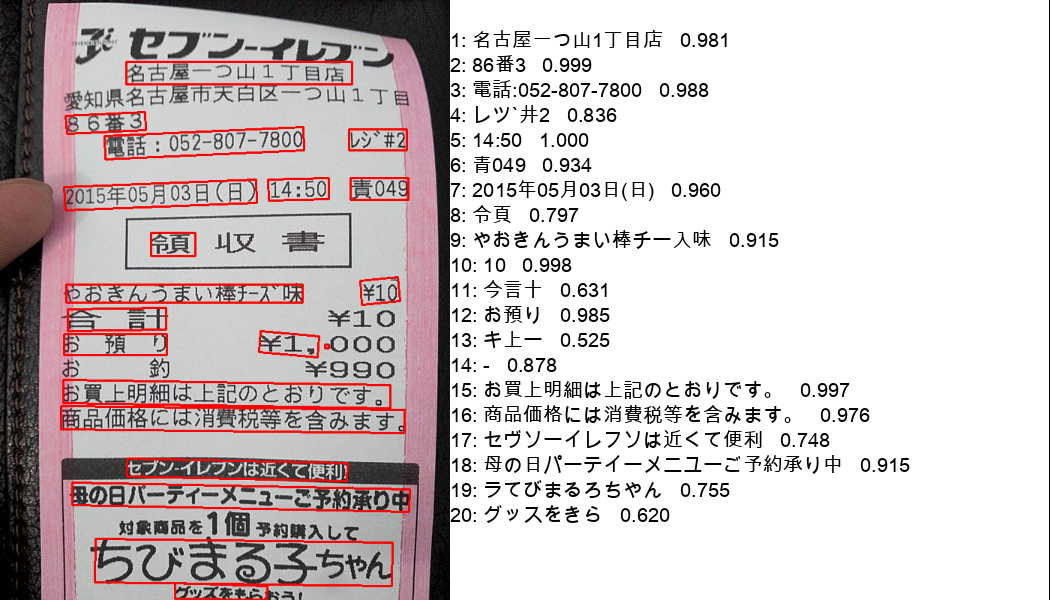

In [90]:
image = Image.open(img2).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
font = ImageFont.load_default()
#im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
im_show = draw_ocr(image, boxes, txts, scores, font_path='/Library/Fonts//Arial Unicode.ttf')
im_show = Image.fromarray(im_show)
im_show